# <font color=#219ebc>Recommandation de films - Exploration </font>

# Sommaire
* [Configuration](#Configuration)
* [Chargement des données](#Chargement-des-donnees)
* [Exploration](#Exploration)
    * [Distributions](#Distributions)
    * [ACP](#ACP)
    * [Non-negative matrix factorization](#Nonnegative-matrix-factorization)
    * [Règles d'association](#Regles-d'association)
        * [Genres](#Genres)
        * [Scores et likes](#Scores-et-likes)
        * [Scores et budget](#Scores-et-budget)
    * [Similarités](#Similarites)
    * [KMeans](#KMeans)
    * [DBSCAN](#DBSCAN)


* [A faire](#A-faire)

## <font color=#fb8500>Configuration</font>

On configure l'affichage de matplotlib en utilisant seaborn, cela nous permettra d'avoir un joli affichage et de profiter des performances de matplotlib

In [1]:
import matplotlib as mplt

import seaborn as sns
sns.set(font='Franklin Gothic Book',rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

# use the .set_context() method to fine-tune font size settings.
#sns.set_context("notebook", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":14})

mplt.font_manager._rebuild()

## <font color=#fb8500>Chargement des donnees</font>

In [2]:
import time
start=time.time()

In [3]:
import pandas as pd

dfGenres=pd.read_csv("./movie_genres.csv",sep=",",encoding="utf-8")
dfPlots=pd.read_csv("./movie_plots.csv",sep=",",encoding="utf-8")
dfMovies=pd.read_csv("./movie_metadata_clean.csv",sep=",",encoding="utf-8")

In [4]:
dfMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4919 entries, 0 to 4918
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   director_name            4817 non-null   object 
 1   num_critic_for_reviews   4870 non-null   float64
 2   duration                 4904 non-null   float64
 3   director_facebook_likes  4817 non-null   float64
 4   actor_3_facebook_likes   4896 non-null   float64
 5   actor_2_name             4906 non-null   object 
 6   actor_1_facebook_likes   4912 non-null   float64
 7   gross                    4056 non-null   float64
 8   genres                   4919 non-null   object 
 9   actor_1_name             4912 non-null   object 
 10  movie_title              4919 non-null   object 
 11  num_voted_users          4919 non-null   int64  
 12  actor_3_name             4896 non-null   object 
 13  facenumber_in_poster     4906 non-null   float64
 14  plot_keywords           

In [5]:
dfPlots

,soldier,critically_bashed,neighbor,dream,superhero,coach,princess,one_word_title,magic,baby,...,boy,alien,high_school,new_york_city,police,death,nan,murder,friend,love
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
dfGenres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4919 entries, 0 to 4918
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       4919 non-null   int64
 1   adventure    4919 non-null   int64
 2   animation    4919 non-null   int64
 3   biography    4919 non-null   int64
 4   comedy       4919 non-null   int64
 5   crime        4919 non-null   int64
 6   documentary  4919 non-null   int64
 7   drama        4919 non-null   int64
 8   family       4919 non-null   int64
 9   fantasy      4919 non-null   int64
 10  film_noir    4919 non-null   int64
 11  history      4919 non-null   int64
 12  horror       4919 non-null   int64
 13  music        4919 non-null   int64
 14  musical      4919 non-null   int64
 15  mystery      4919 non-null   int64
 16  romance      4919 non-null   int64
 17  sci_fi       4919 non-null   int64
 18  short        4919 non-null   int64
 19  sport        4919 non-null   int64
 20  thriller

In [7]:
import numpy as np
# identification des colonnes numériques et qualitatives
colonnesQuantitatives=dfMovies.select_dtypes(np.number).columns.tolist()
colonnesQualitatives=dfMovies.select_dtypes('O').columns.tolist()

## <font color=#fb8500>Exploration</font>

### <font color=#ffb703>Distributions</font>

#### <font color=#ffb703>Réalisateurs</font>

In [8]:
pd.options.display.min_rows = 20

#dfMoviesGrouped=dfMovies.groupby('director_name').agg({'movie_title': 'count'},{'score_imdb':'sum'}).sort_values(by='movie_title',ascending=False).head(100)
dfMoviesDirectorGrouped=dfMovies.groupby('director_name').agg({'movie_title': 'count','imdb_score':'sum'}).sort_values(by=['movie_title'],ascending=False).head(100)
dfMoviesDirectorGrouped

,movie_title,imdb_score
director_name,,
steven spielberg,26,194.5
woody allen,22,154.2
martin scorsese,20,153.2
clint eastwood,20,144.5
ridley scott,16,114.1
spike lee,16,105.1
renny harlin,15,86.2
steven soderbergh,15,100.2
tim burton,14,98.7


findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


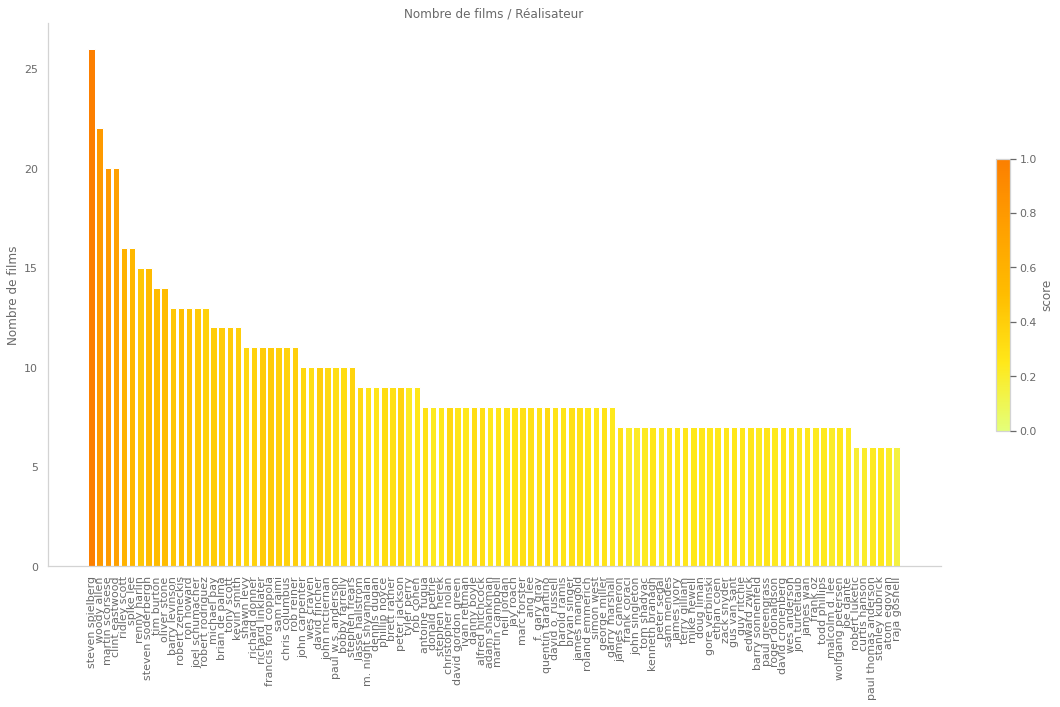

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# taille du schema
plt.rcParams["figure.figsize"] = (20,10)
plt.title('Nombre de films / Réalisateur')
plt.ylabel('Nombre de films')
plt.xticks(rotation=90)

# Choisisson un jeu de couleur
cmap = plt.cm.get_cmap('Wistia')

# normalise l'amplitude (prends les données entre les bornes [vmin, vmax] -> [0, valeur max])
normalise = Normalize(vmin=0, vmax=dfMoviesDirectorGrouped['imdb_score'].max())

plot=plt.bar(dfMoviesDirectorGrouped.index,dfMoviesDirectorGrouped['movie_title'].values,color=cmap(normalise(dfMoviesDirectorGrouped['imdb_score'].values)))
#plot=plt.bar(dfMoviesGrouped.index,dfMoviesGrouped['movie_title'].values,color=my_cmap(dfMoviesGrouped['imdb_score'].values))
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label="score",shrink=0.5, orientation='vertical')

plt.show()

#### <font color=#ffb703>Actors</font>

In [10]:
dfMovies[['movie_title','actor_1_name','actor_2_name','actor_3_name']]
pd.options.display.min_rows = 20

#dfMoviesGrouped=dfMovies.groupby('director_name').agg({'movie_title': 'count'},{'score_imdb':'sum'}).sort_values(by='movie_title',ascending=False).head(100)
dfMoviesActorGrouped=dfMovies.groupby('actor_1_name').agg({'movie_title': 'count','imdb_score':'sum'}).sort_values(by=['movie_title'],ascending=False).head(100)
dfMoviesActorGrouped

,movie_title,imdb_score
actor_1_name,,
robert de niro,48,324.5
johnny depp,36,244.1
nicolas cage,32,198.8
j.k. simmons,29,193.2
matt damon,29,202.5
denzel washington,29,204.6
bruce willis,28,183.4
liam neeson,27,175.0
steve buscemi,27,173.5


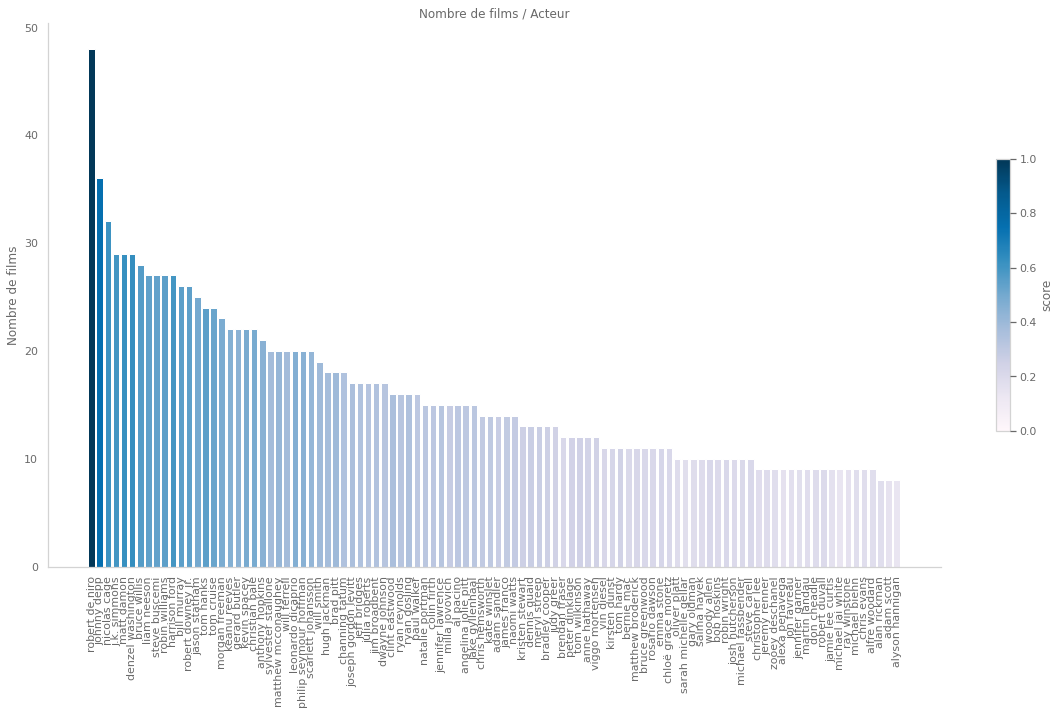

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# taille du schema
plt.rcParams["figure.figsize"] = (20,10)
plt.title('Nombre de films / Acteur')
plt.ylabel('Nombre de films')
plt.xticks(rotation=90)

# Choisisson un jeu de couleur
cmap = plt.cm.get_cmap('PuBu')

# normalise l'amplitude (prends les données entre les bornes [vmin, vmax] -> [0, valeur max])
normalise = Normalize(vmin=0, vmax=dfMoviesActorGrouped['imdb_score'].max())

plot=plt.bar(dfMoviesActorGrouped.index,dfMoviesActorGrouped['movie_title'].values,color=cmap(normalise(dfMoviesActorGrouped['imdb_score'].values)))
#plot=plt.bar(dfMoviesGrouped.index,dfMoviesGrouped['movie_title'].values,color=my_cmap(dfMoviesGrouped['imdb_score'].values))
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label="score",shrink=0.5, orientation='vertical')

plt.show()

#### <font color=#ffb703>Likes</font>

#### <font color=#ffb703>Budget-revenus</font>

#### <font color=#ffb703>Score imdb</font>

### <font color=#ffb703>ACP</font>

In [12]:
# filtrage sur les plots (8k variables)
dataPCA=dfGenres.dropna()
#dataPCA=dfGenres.iloc[:, 0:14].dropna()
nomsIndividus=dfGenres.index # Individus

variables=dataPCA.columns # Variables
X=dataPCA.values # Valeurs

In [13]:
from sklearn import preprocessing

centreReduit = preprocessing.StandardScaler().fit(X)
XCentreReduit = centreReduit.transform(X)
XCentreReduit.shape

(4919, 23)

In [14]:
from sklearn import decomposition

nComposantes=22 # n_comp <= nombre de variables
pca = decomposition.PCA(n_components=nComposantes)
pca.fit(XCentreReduit)

PCA(n_components=22)

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


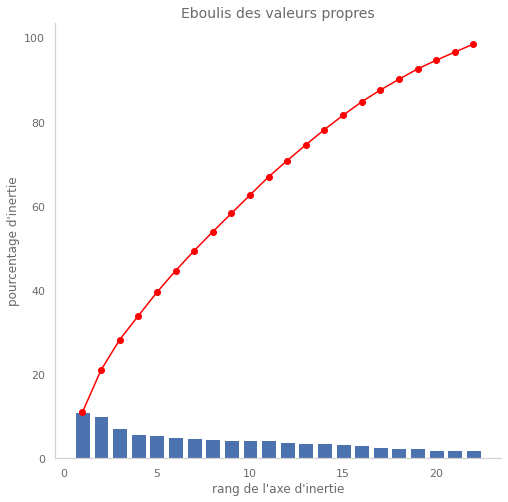

In [15]:
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (8,8)

vectVarianceExpliquee = pca.explained_variance_ratio_*100 # renvoie les variences expliquées pour chacune des dimensions
plt.bar(np.arange(len(vectVarianceExpliquee))+1, vectVarianceExpliquee)
plt.plot(np.arange(len(vectVarianceExpliquee))+1, vectVarianceExpliquee.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres",fontsize=14,fontweight='normal')
plt.show()

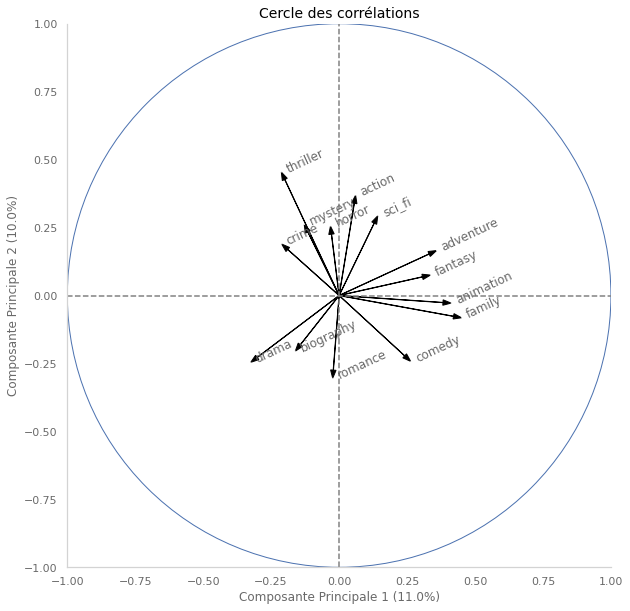

In [16]:
import numpy as np

composantesPrincipales = pca.components_ # triés par variance expliquée

# Selection du plan Factoriel
#dimension 1
d1=0
#dimension 2
d2=1

# taille du schema
plt.rcParams["figure.figsize"] = (10,10)

fig, ax = plt.subplots()

# configuration de la bordure
plt.xlim(-1,1)
plt.ylim(-1,1)

# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# libelles des axes
plt.xlabel('Composante Principale {} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
plt.ylabel('Composante Principale {} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
plt.title('Cercle des corrélations',color="black",fontsize=14,fontweight='normal')
# afficher le cercle
cercle = plt.Circle((0,0),radius=1, color='b', fill=False)
ax.set_aspect(1)
ax.add_patch(cercle)


#placement des étiquettes des p variables + fleches (partant du centre vers les points projetés)
for i in range(len(variables)):
    p=np.array([composantesPrincipales[d1][i],composantesPrincipales[d2][i]])


    # on utilise la distance euclidienne pour n'afficher les labels que pour les individus loin du centre
    distance= np.linalg.norm(p-np.array([0,0]))

    if distance>0.25:
        plt.annotate(variables[i],xy =(composantesPrincipales[d1][i],composantesPrincipales[d2][i]),xytext =(composantesPrincipales[d1][i]+0.01,composantesPrincipales[d2][i]),arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3"),rotation=25) 
        plt.arrow(0,0,composantesPrincipales[d1][i],composantesPrincipales[d2][i].astype(np.float),length_includes_head=True,head_width=0.02, head_length=0.03,color="black")
    
#import os
#os.system('say "jai fini de travailler"')    

L'analyse en composante principale sur plots n'est pas concluante: il y a beaucoup trop de composantes nécéssaires pour expliquer la variance totale

L'analyse en composante principale sur genres permet de dégager 3 grands genres de films, les thrillers/horreur, les romance/drama et les téléréalités

### <font color=#ffb703>Nonnegative matrix factorization</font>

On essaie de découvrir les facteurs latents qui constituent les plots

In [17]:
pd.set_option('display.max_rows', 15) 


dfPlots.iloc[9]

soldier              0
critically_bashed    0
neighbor             0
dream                0
superhero            0
coach                0
princess             0
                    ..
new_york_city        0
police               0
death                0
nan                  0
murder               0
friend               0
love                 1
Name: 9, Length: 84, dtype: int64

On constate que certains films n'ont aucun plot, il faut donc les exclure de l'étude

In [18]:
# on masque les plots nuls sur toutes les colonnes
mask = (dfPlots == 0).all(axis=1)

In [19]:
del dfPlots['nan']
X=dfPlots[~mask]
X.shape

(3030, 83)

In [20]:
import numpy as np
from sklearn.decomposition import NMF

pd.set_option('display.max_columns', 30)

nbFacteurs=8

model = NMF(n_components=nbFacteurs, init='random', random_state=0)
W = model.fit_transform(X) # matrice de "weight (poids)" qui determine la contribution des films sur le facteur latent
H = model.components_ # la matrice de contribution du facteur à la variable plot

nX = np.dot(W, H) #on teste la matrice nX, predit par le produit pour verifier si on est proche de la matrice de départ

In [21]:
# la matrice de contribution des 5 facteurs latents à la variable plot
dfH=pd.DataFrame(data=H,    # values
             index=range(nbFacteurs),    #  index
             columns=dfPlots.columns)
dfH

,soldier,critically_bashed,neighbor,dream,superhero,coach,princess,one_word_title,magic,baby,family_relationships,gangster,gay,bar,sheriff,...,prison,drugs,friendship,fbi,revenge,school,boy,alien,high_school,new_york_city,police,death,murder,friend,love
0,0.004410,0.006247,0.003153,0.000000,0.000000,0.000240,0.002674,0.002988,0.002489,0.009512,0.002453,0.000000,0.006364,0.002177,0.001654,...,0.000000,0.001135,0.058852,0.000608,0.000412,0.001202,0.027884,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.473235,0.00000
1,0.000000,0.006858,0.005277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024826,0.005827,0.008589,0.017758,...,0.024544,0.087162,0.003411,0.000075,0.001876,0.002541,0.000000,0.000000,0.00000,0.000000,0.695623,0.000000,0.000000,0.000000,0.00000
2,0.013436,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006051,0.000000,0.000000,0.006053,0.004630,0.000000,0.005799,0.017648,...,0.000497,0.029142,0.000600,0.067590,0.044582,0.000000,0.002597,0.000000,0.00000,0.000000,0.000000,0.000000,0.903694,0.000000,0.00000
3,0.013009,0.026498,0.001908,0.004898,0.012462,0.000000,0.020976,0.001893,0.007372,0.038319,0.000356,0.002453,0.000000,0.019066,0.009784,...,0.172243,0.000000,0.000000,0.083469,0.053762,0.004481,0.061636,0.846377,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.000000,0.000000,0.020934,0.026871,0.000000,0.000000,0.013258,0.012837,0.013177,0.003505,0.013356,0.000000,0.003409,0.020840,0.002739,...,0.002626,0.011658,0.034530,0.000000,0.021560,0.000149,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.14313
5,0.001424,0.020907,0.019545,0.014738,0.016026,0.000000,0.000000,0.015945,0.000627,0.014450,0.000733,0.013896,0.000000,0.001733,0.000000,...,0.000000,0.004444,0.050525,0.000000,0.022075,0.000000,0.000000,0.000000,0.00000,0.959856,0.000000,0.000000,0.000000,0.000000,0.00000
6,0.000855,0.000000,0.001372,0.000000,0.002370,0.094993,0.000000,0.000331,0.015953,0.013051,0.026316,0.000000,0.068591,0.000000,0.027396,...,0.009367,0.050151,0.003128,0.003414,0.028866,0.518321,0.101956,0.000000,0.94902,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
7,0.010485,0.000000,0.009944,0.023866,0.001238,0.008697,0.000000,0.000000,0.011516,0.009695,0.000000,0.000000,0.000000,0.009360,0.032159,...,0.005862,0.000000,0.000000,0.039919,0.019758,0.000000,0.026127,0.000000,0.00000,0.000000,0.000000,1.228241,0.000000,0.000000,0.00000


On essaie d'interpreter les facteurs latents\
Pour ce faire, on identifie les variables qui contribuent le plus en les triant par valeur de contribution

In [22]:
# variables qui contribuent le plus sur les facteurs latents
dfH.sum().sort_values(ascending=False).head(nbFacteurs+4)

death            1.228241
love             1.143130
new_york_city    0.959856
high_school      0.949020
murder           0.903694
alien            0.846377
police           0.695623
school           0.526695
friend           0.473235
teacher          0.270160
student          0.245893
teenager         0.234028
dtype: float64

Maintenant, nous allons chercher parmi ces variables  contributrices sur quelles composantes elles sont les plus determinantes

In [23]:
dfH[['murder', 'love', 'new_york_city', 'high_school', 'death', 'alien', 'police', 'school', 'friend', 'teacher', 'student', 'teenager'
]]

,murder,love,new_york_city,high_school,death,alien,police,school,friend,teacher,student,teenager
0,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.001202,0.473235,0.000000,0.000000,0.000546
1,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.695623,0.002541,0.000000,0.000000,0.000000,0.000000
2,0.903694,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003091
3,0.000000,0.00000,0.000000,0.00000,0.000000,0.846377,0.000000,0.004481,0.000000,0.000000,0.000000,0.009902
4,0.000000,1.14313,0.000000,0.00000,0.000000,0.000000,0.000000,0.000149,0.000000,0.005464,0.019149,0.005202
5,0.000000,0.00000,0.959856,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050564,0.014542,0.008041
6,0.000000,0.00000,0.000000,0.94902,0.000000,0.000000,0.000000,0.518321,0.000000,0.214132,0.212202,0.202501
7,0.000000,0.00000,0.000000,0.00000,1.228241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004746


On devine que le facteur 4, correspond à au plot police puisque la variable police est la seule à contribuer dessus.
Par analogie, on en deduit que :
* l'axe 2 correspond aux intrigues 'death'
* l'axe 4 correspond aux intrigues 'love'
* l'axe 5 correspond aux intrigues 'new_york_city'
* l'axe 7 aux intrigues 'murder'
* l'axe 1 aux intrigues 'police'
* l'axe 0 aux intrigues 'friend'
* l'axe 6 aux intrigues 'high_school'
* l'axe 3 aux intrigues 'alien'



et que tous les autres plots peuvent s'expliquer à partir de ces facteurs

In [24]:
pd.set_option('display.min_rows',20 )
dfW=pd.DataFrame(data=W,    # values
             index=dfMovies['movie_title'][~mask],    #  index
             columns=['friend','police','death','alien','love','new_york_city','high_school','murder'])
dfW

,friend,police,death,alien,love,new_york_city,high_school,murder
movie_title,,,,,,,,
avatar,0.000000,0.013674,0.037867,0.102681,0.000000,0.000000,0.000000,0.000000
spectre,0.000000,0.053976,0.005381,0.045391,0.000000,0.078372,0.000000,0.026138
star wars episode vii the force awakens,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
john carter,0.000000,0.000000,0.000000,1.016239,0.001988,0.000000,0.000000,0.000000
avengers age of ultron,0.000000,0.000000,0.000000,0.014379,0.000000,0.016499,0.001163,0.000493
harry potter and the half blood prince,0.000000,0.000000,0.027488,0.014700,0.867852,0.000000,0.010169,0.008410
batman v superman dawn of justice,0.000000,0.000000,0.000000,0.014379,0.000000,0.016499,0.001163,0.000493
...,...,...,...,...,...,...,...,...
the cure,0.039796,0.000000,1.085247,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
pd.options.display.max_colwidth = 100
dfMovies[dfMovies['movie_title'].str.contains("avatar")][["movie_title","plot_keywords","genres"]]

,movie_title,plot_keywords,genres
0,avatar,avatar future marine native paraplegic,action adventure fantasy sci_fi


In [26]:
dfW[dfW.index.str.contains('love')]

,friend,police,death,alien,love,new_york_city,high_school,murder
movie_title,,,,,,,,
eat pray love,0.000000,0.000000,0.016041,0.000000,0.001024,0.015918,0.063305,0.004014
from paris with love,0.000000,0.045255,0.005447,0.059106,0.000000,0.067998,0.000545,0.028671
"crazy, stupid, love.",2.109655,0.008419,0.002395,0.014529,0.008029,0.004003,0.000000,0.016132
love actually,0.000000,0.000000,0.000000,0.005364,0.009803,0.043721,0.000000,0.008579
love in the time of cholera,0.000000,0.000000,0.000000,0.000000,0.924888,0.000000,0.018477,0.000000
"i love you, man",2.127118,0.000000,0.000000,0.000000,0.011940,0.000000,0.007734,0.000000
must love dogs,0.020228,0.000000,0.000000,0.000000,0.869902,0.087783,0.149324,0.000000
...,...,...,...,...,...,...,...,...
love letters,0.000000,0.000000,0.016041,0.000000,0.001024,0.015918,0.063305,0.004014


Au final, la description des films par types de plots, depend beaucoup de la qualité de description des films au départ.

Par exemple: le film 'batman returns' a pour 'plot_keywords' :'box_office_hit dc_comics gotham mayor penguin'
Si on essaye de le decrire par les facteurs latents, on voit que le c'est un peu aleatoire (expliquée uniquement par le facteur "high_school")

### <font color=#ffb703>Regles d'association</font>

#### <font color=#ffb703>Genres</font>

On va 
* générer des groupes d'éléments fréquents qui ont une valeur de support d'au moins 2% (ce nombre est choisi pour que l'on puisse couvrir suffisamment de cas)
* Générez les règles avec leur support, leur confiance et leur lift correspondants.

In [27]:
from mlxtend.frequent_patterns import apriori, association_rules

groupesFrequents= apriori(dfGenres, min_support=0.02, use_colnames=True)
reglesGenres = association_rules(groupesFrequents, metric="lift", min_threshold=1)
reglesGenres.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(action),(adventure),0.226266,0.180524,0.091279,0.403414,2.234678,0.050432,1.373609
1,(adventure),(action),0.180524,0.226266,0.091279,0.505631,2.234678,0.050432,1.565094
2,(crime),(action),0.176662,0.226266,0.064647,0.365938,1.617294,0.024675,1.220282
3,(action),(crime),0.226266,0.176662,0.064647,0.285714,1.617294,0.024675,1.152673
4,(fantasy),(action),0.118520,0.226266,0.035373,0.298456,1.319053,0.008556,1.102903
5,(action),(fantasy),0.226266,0.118520,0.035373,0.156334,1.319053,0.008556,1.044821
6,(sci_fi),(action),0.120960,0.226266,0.065664,0.542857,2.399204,0.038295,1.692544
...,...,...,...,...,...,...,...,...,...
93,"(action, drama)",(thriller),0.067493,0.277292,0.038829,0.575301,2.074712,0.020114,1.701695
94,(thriller),"(action, drama)",0.277292,0.067493,0.038829,0.140029,2.074712,0.020114,1.084347


In [28]:
# On filtrer pour une confiance relativement élevée (.6)
reglesGenres[ (reglesGenres['lift'] >= 2.5) &
      (reglesGenres['confidence'] >= 0.75) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,(animation),(family),0.048790,0.108559,0.041269,0.845833,7.791487,0.035972,5.782322
77,"(thriller, adventure)",(action),0.044521,0.226266,0.034560,0.776256,3.430729,0.024486,3.458119
88,"(crime, action)",(thriller),0.064647,0.277292,0.050620,0.783019,2.823805,0.032694,3.330741
110,"(adventure, animation)",(family),0.033950,0.108559,0.030291,0.892216,8.218742,0.026605,8.270595
134,"(comedy, animation)",(family),0.034560,0.108559,0.030901,0.894118,8.236263,0.027149,8.419168
160,"(crime, mystery)",(thriller),0.031104,0.277292,0.025412,0.816993,2.946328,0.016787,3.949082
168,"(mystery, drama)",(thriller),0.051230,0.277292,0.039236,0.765873,2.761972,0.025030,3.086820
174,"(crime, action, drama)",(thriller),0.026428,0.277292,0.022972,0.869231,3.134711,0.015644,5.526590
187,"(comedy, adventure, animation)",(family),0.024395,0.108559,0.022566,0.925000,8.520740,0.019917,11.885885


Lorsque les films sont de type antecedent, alors il sont égalements de type consequents

#### <font color=#ffb703>Scores et likes</font>

#### Relation entre score et likes?

In [29]:
dfScoresLikes=dfMovies[["director_facebook_likes","actor_1_facebook_likes","actor_2_facebook_likes","actor_3_facebook_likes","movie_facebook_likes","imdb_score"]].dropna()
matriceCorrelation=dfScoresLikes.corr()
matriceCorrelation.style.background_gradient(cmap='coolwarm').set_precision(2)

,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,movie_facebook_likes,imdb_score
director_facebook_likes,1.00,0.09,0.12,0.12,0.17,0.17
actor_1_facebook_likes,0.09,1.00,0.39,0.25,0.13,0.09
actor_2_facebook_likes,0.12,0.39,1.00,0.55,0.24,0.09
actor_3_facebook_likes,0.12,0.25,0.55,1.00,0.27,0.06
movie_facebook_likes,0.17,0.13,0.24,0.27,1.00,0.26
imdb_score,0.17,0.09,0.09,0.06,0.26,1.00


On ne constate pas de correlation apparente

In [30]:
dfScoresLikes.describe()

,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,movie_facebook_likes,imdb_score
count,4797.000000,4797.000000,4797.000000,4797.000000,4797.000000,4797.000000
mean,693.306650,6612.644986,1647.730873,636.944757,7427.601834,6.412383
std,2837.694962,15251.925062,4051.151333,1641.188695,19360.674503,1.118394
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000
25%,7.000000,614.000000,279.000000,131.000000,0.000000,5.800000
50%,48.000000,989.000000,595.000000,367.000000,161.000000,6.500000
75%,192.000000,11000.000000,919.000000,636.000000,2000.000000,7.200000
max,23000.000000,640000.000000,137000.000000,23000.000000,349000.000000,9.500000


Pour la suite, on encode les valeurs du 3e quartile pour reperer les films les mieux notés/scorés.

In [31]:
for c in dfScoresLikes.columns:
    dfScoresLikes[c]=dfScoresLikes[c].apply(lambda x: 1 if (x >=  dfScoresLikes[c].quantile(.75)) else 0)

In [32]:
dfScoresLikes.head()

,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,movie_facebook_likes,imdb_score
0,0,0,1,1,1,1
1,1,1,1,1,0,0
2,0,1,0,0,1,0
3,1,1,1,1,1,1
5,1,0,0,0,1,0


In [33]:
from mlxtend.frequent_patterns import apriori, association_rules

groupesFrequents= apriori(dfScoresLikes, min_support=0.02, use_colnames=True)
reglesLikes = association_rules(groupesFrequents, metric="lift", min_threshold=1)
reglesLikes.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(director_facebook_likes),(actor_1_facebook_likes),0.250156,0.277882,0.099646,0.398333,1.433462,0.030132,1.200196
1,(actor_1_facebook_likes),(director_facebook_likes),0.277882,0.250156,0.099646,0.358590,1.433462,0.030132,1.169054
2,(director_facebook_likes),(actor_2_facebook_likes),0.250156,0.250156,0.084219,0.336667,1.345825,0.021641,1.130418
3,(actor_2_facebook_likes),(director_facebook_likes),0.250156,0.250156,0.084219,0.336667,1.345825,0.021641,1.130418
4,(actor_3_facebook_likes),(director_facebook_likes),0.250573,0.250156,0.075255,0.300333,1.200580,0.012573,1.071715
5,(director_facebook_likes),(actor_3_facebook_likes),0.250156,0.250573,0.075255,0.300833,1.200580,0.012573,1.071886
6,(movie_facebook_likes),(director_facebook_likes),0.260788,0.250156,0.093809,0.359712,1.437950,0.028571,1.171104
...,...,...,...,...,...,...,...,...,...
93,(actor_2_facebook_likes),"(actor_3_facebook_likes, actor_1_facebook_likes)",0.250156,0.140296,0.120700,0.482500,3.439157,0.085604,1.661264
94,"(movie_facebook_likes, actor_1_facebook_likes)",(actor_2_facebook_likes),0.116948,0.250156,0.081301,0.695187,2.779011,0.052046,2.460013


In [34]:
pd.options.display.max_rows=50
# On filtrer pour une confiance relativement élevée (.6)
reglesLikes[ (reglesLikes['lift'] >= 3) &
      (reglesLikes['confidence'] > 0.9) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
274,"(actor_3_facebook_likes, movie_facebook_likes, actor_1_facebook_likes)",(actor_2_facebook_likes),0.063790,0.250156,0.057953,0.908497,3.631716,0.041995,8.19472
347,"(actor_3_facebook_likes, movie_facebook_likes, director_facebook_likes, actor_1_facebook_likes)",(actor_2_facebook_likes),0.029602,0.250156,0.027517,0.929577,3.715986,0.020112,10.64778


quand les likes sur les acteurs 1 et 3 sont elevés , les likes sur l'acteur 2 sont également élevés

#### <font color=#ffb703>Scores et budget</font>

In [35]:
dfScoresGrossBudget=dfMovies[["gross","budget","imdb_score"]].dropna()

In [36]:
dfScoresGrossBudget.describe()

,gross,budget,imdb_score
count,3.790000e+03,3.790000e+03,3790.000000
mean,5.019224e+07,4.472383e+07,6.461689
std,6.872024e+07,2.250798e+08,1.057649
min,1.620000e+02,2.180000e+02,1.600000
25%,6.534417e+06,9.525000e+06,5.900000
50%,2.717721e+07,2.400000e+07,6.600000
75%,6.495038e+07,5.000000e+07,7.200000
max,7.605058e+08,1.221550e+10,9.300000


On encode les valeurs du 3e quartile.\
Pour reperer les films les mieux notés et ayant les plus gros budget/revenus.

In [37]:
for c in dfScoresGrossBudget.columns:
    dfScoresGrossBudget[c]=dfScoresGrossBudget[c].apply(lambda x: 1 if (x >=  dfScoresGrossBudget[c].quantile(.75)) else 0)

In [38]:
from mlxtend.frequent_patterns import apriori, association_rules

groupesFrequents= apriori(dfScoresGrossBudget, min_support=0.02, use_colnames=True)
regles = association_rules(groupesFrequents, metric="lift", min_threshold=1)
regles.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(gross),(budget),0.250132,0.262533,0.151187,0.604430,2.302303,0.085519,1.864317
1,(budget),(gross),0.262533,0.250132,0.151187,0.575879,2.302303,0.085519,1.768054
2,(gross),(imdb_score),0.250132,0.266755,0.091293,0.364979,1.368220,0.024569,1.154679
3,(imdb_score),(gross),0.266755,0.250132,0.091293,0.342235,1.368220,0.024569,1.140025
4,"(gross, imdb_score)",(budget),0.091293,0.262533,0.048285,0.528902,2.014611,0.024318,1.565421
5,"(gross, budget)",(imdb_score),0.151187,0.266755,0.048285,0.319372,1.197249,0.007955,1.077307
6,"(imdb_score, budget)",(gross),0.064380,0.250132,0.048285,0.750000,2.998418,0.032181,2.999472
7,(gross),"(imdb_score, budget)",0.250132,0.064380,0.048285,0.193038,2.998418,0.032181,1.159435
8,(imdb_score),"(gross, budget)",0.266755,0.151187,0.048285,0.181009,1.197249,0.007955,1.036413
9,(budget),"(gross, imdb_score)",0.262533,0.091293,0.048285,0.183920,2.014611,0.024318,1.113502


In [39]:
pd.options.display.max_rows=50
# On filtrer pour une confiance relativement élevée (.6)
regles[ (regles['lift'] >= 2) &
      (regles['confidence'] >= 0.7) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,"(imdb_score, budget)",(gross),0.06438,0.250132,0.048285,0.75,2.998418,0.032181,2.999472


Lorsque le score imdb est elevée et que c'est un film à budget, le film rapporte du revenu

### <font color=#ffb703>Similarites</font>

#### Similarite cosinus

Soit A le vecteur film, B le vecteur genre

$\displaystyle sim(A,B)=cos(θ)=\frac{A.B}{\|A\| \|B\|}$

Sur la base de la valeur du cosinus, qui varie entre -1 et 1, les films sont classés par ordre décroissant

In [40]:
import numpy as np

def similariteCosinus(A, B):
    AB=A.T.dot(B)
    ANorm=np.linalg.norm(A)
    BNorm=np.linalg.norm(B)
    
    #result=np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
    result = AB/(ANorm * BNorm)
    return result

In [41]:
# calcul de similarité Cosinus entre 2 films par genre
A = np.array(dfGenres.iloc[1])
B = np.array(dfGenres.iloc[2])
similariteCosinus(A,B)

0.6666666666666667

In [42]:
def matriceSimilariteCosinus(A,B):
    num=np.dot(A,B.T)
    p1=np.array(np.sqrt(np.sum(A**2,axis=1)))[:,np.newaxis]
    p2=np.array(np.sqrt(np.sum(B**2,axis=1)))[np.newaxis,:]
    return num/(p1*p2)

In [43]:
# calcul de similarité entre l'ensemble des 4000 films suivant leurs genres
m=matriceSimilariteCosinus(dfGenres,dfGenres)
print(m)

[[1.         0.8660254  0.57735027 ... 0.         0.         0.        ]
 [0.8660254  1.         0.66666667 ... 0.         0.         0.        ]
 [0.57735027 0.66666667 1.         ... 0.33333333 0.         0.        ]
 ...
 [0.         0.         0.33333333 ... 1.         0.33333333 0.        ]
 [0.         0.         0.         ... 0.33333333 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


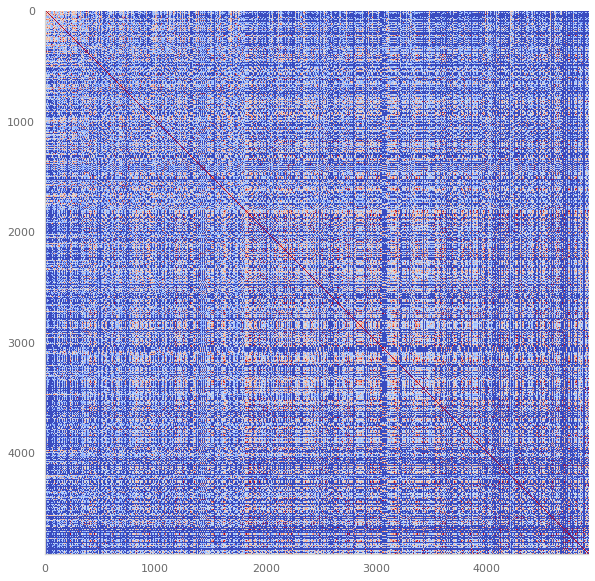

In [44]:
# Heatmap des similarités
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

plt.imshow(m,cmap='coolwarm',interpolation='nearest')

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


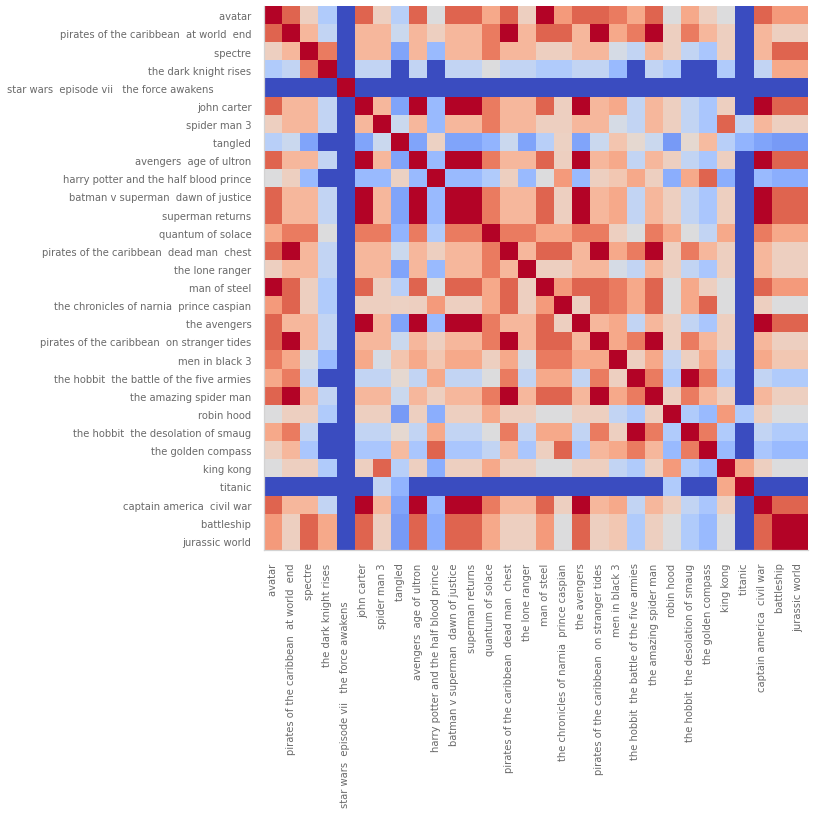

In [45]:
# Zoom Heatmap des similarités

plt.imshow(m[0:30,0:30],cmap='coolwarm',interpolation='nearest');
plt.xticks(range(30), dfMovies['movie_title'][0:30], size='small',rotation='vertical');
plt.yticks(range(30), dfMovies['movie_title'][0:30], size='small');

### <font color=#ffb703>KMeans</font>

#### Genres

In [46]:
X = dfGenres

In [47]:
#normalisation
from sklearn import preprocessing

X_normalise=preprocessing.scale(X)
print(X_normalise.shape)

(4919, 23)


In [48]:
import numpy as np

print(np.mean(X_normalise))
print(np.var(X_normalise))

1.4193646488927817e-17
1.0


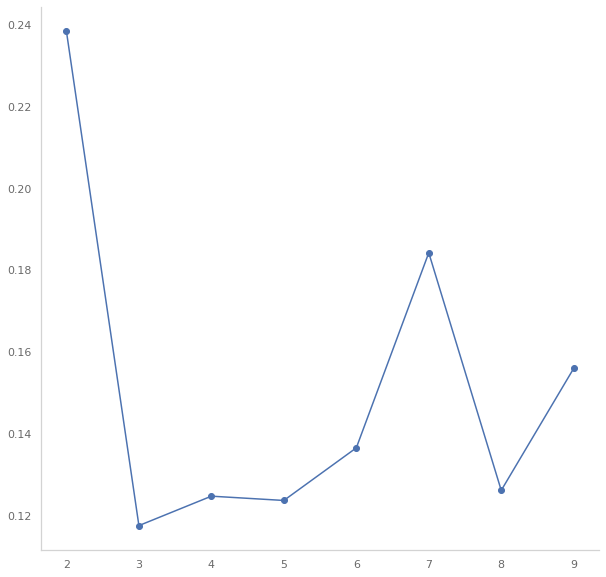

In [49]:
from sklearn import cluster, metrics
from matplotlib import pyplot as plt

silhouettes=[]
for n in range(2,10):
    c = cluster.KMeans(n_clusters=n,
                      n_init=1, init='random')# pour avoir une initialisation aleatoire et unique
    c.fit(X_normalise)# faire le clustering sur les données normalisée et calculer le coefficient de silhouette
    silhouette=metrics.silhouette_score(X_normalise,c.labels_)
    silhouettes.append(silhouette)

plt.plot(range(2,10), silhouettes, marker='o')

In [50]:
# pour projeter les donnees sur 2 dimensions
from sklearn import decomposition
pca=decomposition.PCA(n_components=23)
pca.fit(X_normalise)
print(pca.explained_variance_ratio_.cumsum())
X_trans=pca.transform(X_normalise)

[0.1097717  0.2100037  0.28183074 0.33872022 0.39447666 0.44580867
 0.49341416 0.53842807 0.58216443 0.62582721 0.66911784 0.70776108
 0.74515249 0.78158244 0.8153635  0.84744685 0.87533696 0.90096173
 0.92561257 0.94615528 0.96560067 0.98456911 1.        ]


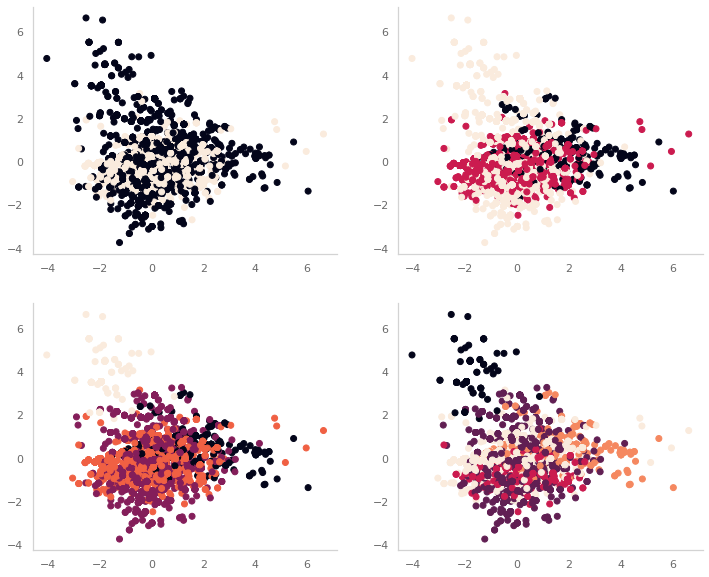

In [51]:
fig = plt.figure(figsize=(12,10))
# choix des plans factoriels
d1=4
d2=5

# separation en 2 clusters
c2=cluster.KMeans(n_clusters=2)
c2.fit(X_normalise)
ax=fig.add_subplot(221) # une sous figure en ordonnée
ax.scatter(X_trans[:,d1],X_trans[:,d2],c=c2.labels_) # projection suivant la premiere et deuxieme composante

# séparation en 3 clusters
c3=cluster.KMeans(n_clusters=3)
c3.fit(X_normalise)
ax=fig.add_subplot(222) # une sous figure en ordonnée
ax.scatter(X_trans[:,d1],X_trans[:,d2],c=c3.labels_) # projection suivant la premiere et deuxieme composante

# séparation en 4 clusters
c4=cluster.KMeans(n_clusters=4)
c4.fit(X_normalise)
ax=fig.add_subplot(223) # une sous figure en ordonnée
ax.scatter(X_trans[:,d1],X_trans[:,d2],c=c4.labels_) # projection suivant la premiere et deuxieme composante

# séparation en 5 clusters
c5=cluster.KMeans(n_clusters=5)
c5.fit(X_normalise)
ax=fig.add_subplot(224) # une sous figure en ordonnée
ax.scatter(X_trans[:,d1],X_trans[:,d2],c=c5.labels_) # projection suivant la premiere et deuxieme composante

La méthode du coude est l'une des méthodes les plus populaires utilisées pour sélectionner le nombre optimal de clusters en ajustant le modèle avec une plage de valeurs pour K dans l'algorithme K-means.\
La méthode du coude nécessite de tracer un tracé linéaire entre SSE (somme des erreurs au carré) et le nombre de clusters et de trouver le point représentant le «point du coude» (le point après lequel l'ESS ou l'inertie commence à diminuer de manière linéaire).

In [52]:
from sklearn.cluster import KMeans
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
    
# A list holds the SSE values (inertia plot) for each k
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_normalise)
    sse.append(kmeans.inertia_)

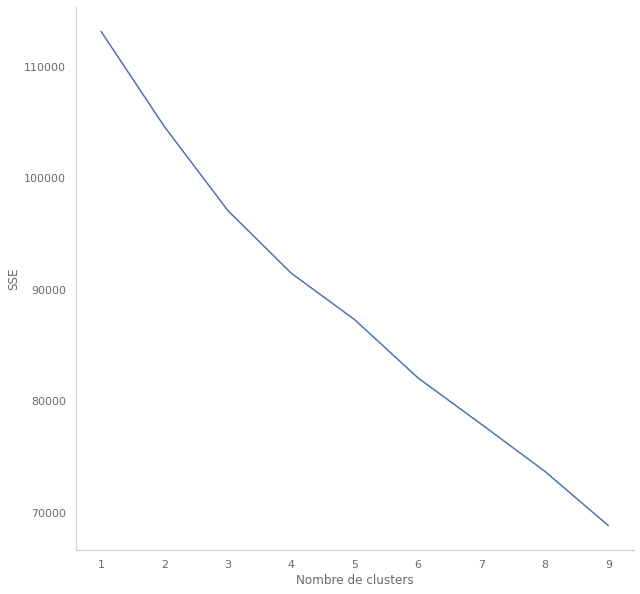

In [53]:
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Nombre de clusters")
plt.ylabel("SSE")
plt.show()

### <font color=#ffb703>DBSCAN</font>

L'algorithme DBSCAN utilise 2 paramètres : la distance ε et le nombre minimum de points MinPts

MinPts devant se trouver dans un rayon ε pour que ces points soient considérés comme un cluster
Cherchons les meilleurs parametres de clustering DBSCAN

In [54]:
from itertools import product

eps_values = np.arange(3,10,1) # valeurs de eps a tester
min_samples = np.arange(3,10) # valeurs de min_samples a tester
DBSCAN_params = list(product(eps_values, min_samples))

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

nb_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_normalise)
    nb_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_normalise, DBS_clustering.labels_))

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


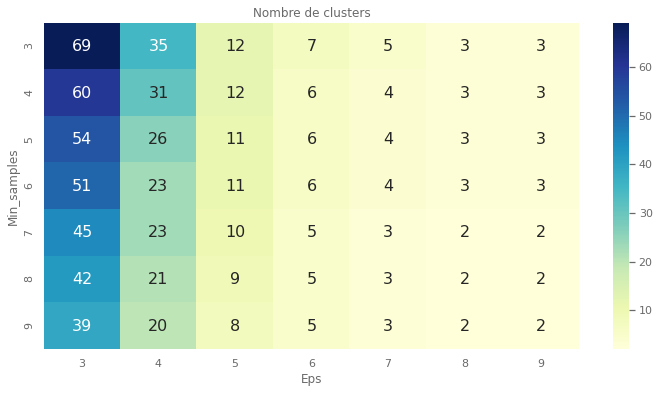

In [56]:
import seaborn as sns

tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Nb_clusters'] = nb_clusters

pivot_1 = pd.pivot_table(tmp, values='Nb_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Nombre de clusters')
plt.show()

In [57]:
DBS_clustering = DBSCAN(eps=5, min_samples=5).fit(X_normalise)

DBSCAN_clustered = pd.DataFrame(data=X_normalise.copy(),columns=dfGenres.columns,index=dfMovies['movie_title'])
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # ajoute les labels de clusters sur les points

In [58]:
# Repartition par cluster
DBSCAN_clustered["Cluster"].value_counts()

 0    4226
 4     172
 5     159
 2     123
 1     100
 3      82
-1      26
 7       9
 8       8
 6       8
 9       6
Name: Cluster, dtype: int64

On a 10 clusters avec une majorité dans le cluster 0

In [59]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

In [60]:
temp=DBSCAN_clustered[DBSCAN_clustered['Cluster']==8]
temp.loc[ : , temp.columns != "Cluster"].sum().sort_values(ascending=False)

documentary    50.376434
history        38.658700
biography      10.710087
music           8.150628
crime           1.538363
short          -0.255186
film_noir      -0.279571
western        -1.116620
musical        -1.323270
sport          -1.545596
war            -1.689411
animation      -1.811837
mystery        -2.645837
thriller       -2.721556
family         -2.791745
horror         -2.809308
fantasy        -2.933456
sci_fi         -2.967602
adventure      -3.754828
romance        -4.253260
action         -4.326166
comedy         -6.205847
drama          -6.248523
dtype: float64

In [61]:
for c in range(len(DBSCAN_clustered["Cluster"].value_counts())):
    cCluster=DBSCAN_clustered[DBSCAN_clustered['Cluster']==c]
    print(f"Cluster {c} -> {cCluster.loc[ : , cCluster.columns != 'Cluster'].sum().sort_values(ascending=False).head(1)}")

#DBSCAN_clustered[DBSCAN_clustered['Cluster']==2]

Cluster 0 -> thriller    319.802595
dtype: float64
Cluster 1 -> documentary    629.705428
dtype: float64
Cluster 2 -> musical    743.612248
dtype: float64
Cluster 3 -> western    587.487438
dtype: float64
Cluster 4 -> history    831.16204
dtype: float64
Cluster 5 -> sport    822.983761
dtype: float64
Cluster 6 -> sport    41.407988
dtype: float64
Cluster 7 -> documentary    56.673488
dtype: float64
Cluster 8 -> documentary    50.376434
dtype: float64
Cluster 9 -> film_noir    171.691584
dtype: float64
Cluster 10 -> action    0.0
dtype: float64


In [62]:
#DBSCAN_clustered[DBSCAN_clustered['Cluster']==2].sum().sort_values(ascending=False).head(1)
DBSCAN_clustered[DBSCAN_clustered['Cluster']==5]

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film_noir,history,horror,music,musical,mystery,romance,sci_fi,short,sport,thriller,war,western,Cluster
movie_title,,,,,,,,,,,,,,,,,,,,,,,,
cars 2,-0.540771,2.130590,4.415409,-0.250755,1.289107,-0.463215,-0.158804,-1.031183,2.865591,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
turbo,-0.540771,2.130590,4.415409,-0.250755,1.289107,-0.463215,-0.158804,-1.031183,2.865591,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
speed racer,1.849212,-0.469354,-0.226480,-0.250755,-0.775731,-0.463215,-0.158804,-1.031183,2.865591,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
real steel,1.849212,-0.469354,-0.226480,-0.250755,-0.775731,-0.463215,-0.158804,0.969760,-0.348968,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,2.695779,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
ali,-0.540771,-0.469354,-0.226480,3.987954,-0.775731,-0.463215,-0.158804,0.969760,-0.348968,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
point break,1.849212,-0.469354,-0.226480,-0.250755,-0.775731,2.158826,-0.158804,-1.031183,-0.348968,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,1.614405,-0.211176,-0.139577,5
surf up,-0.540771,-0.469354,4.415409,-0.250755,1.289107,-0.463215,-0.158804,-1.031183,2.865591,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
cinderella man,-0.540771,-0.469354,-0.226480,3.987954,-0.775731,-0.463215,-0.158804,0.969760,-0.348968,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
the longest yard,-0.540771,-0.469354,-0.226480,-0.250755,1.289107,2.158826,-0.158804,-1.031183,-0.348968,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5


In [63]:
dfMovies[dfMovies["movie_title"].str.contains("hulk")]

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
166,ang lee,267.0,138.0,0.0,258.0,regi davis,820.0,132122995.0,action sci_fi,kevin rankin,hulk,212106,celia weston,0.0,1980s c_130_hercules monster panzer san_francisco_california,1445.0,137000000.0,2003.0,300.0,5.7,0
175,louis leterrier,354.0,135.0,255.0,882.0,peter mensah,3000.0,134518390.0,action adventure sci_fi,ty burrell,the incredible hulk,326286,william hurt,0.0,antidote cure hulk marvel_cinematic_universe opening_action_scene,643.0,150000000.0,2008.0,1000.0,6.8,0


In [64]:
dfGenres.iloc[166]

action         1
adventure      0
animation      0
biography      0
comedy         0
crime          0
documentary    0
drama          0
family         0
fantasy        0
film_noir      0
history        0
horror         0
music          0
musical        0
mystery        0
romance        0
sci_fi         1
short          0
sport          0
thriller       0
war            0
western        0
Name: 166, dtype: int64

In [65]:
#DBSCAN_clustered[DBSCAN_clustered['Cluster']==5].sum().sort_values(ascending=False)
DBSCAN_clustered[DBSCAN_clustered['Cluster']==5]

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film_noir,history,horror,music,musical,mystery,romance,sci_fi,short,sport,thriller,war,western,Cluster
movie_title,,,,,,,,,,,,,,,,,,,,,,,,
cars 2,-0.540771,2.130590,4.415409,-0.250755,1.289107,-0.463215,-0.158804,-1.031183,2.865591,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
turbo,-0.540771,2.130590,4.415409,-0.250755,1.289107,-0.463215,-0.158804,-1.031183,2.865591,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
speed racer,1.849212,-0.469354,-0.226480,-0.250755,-0.775731,-0.463215,-0.158804,-1.031183,2.865591,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
real steel,1.849212,-0.469354,-0.226480,-0.250755,-0.775731,-0.463215,-0.158804,0.969760,-0.348968,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,2.695779,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
ali,-0.540771,-0.469354,-0.226480,3.987954,-0.775731,-0.463215,-0.158804,0.969760,-0.348968,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
point break,1.849212,-0.469354,-0.226480,-0.250755,-0.775731,2.158826,-0.158804,-1.031183,-0.348968,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,1.614405,-0.211176,-0.139577,5
surf up,-0.540771,-0.469354,4.415409,-0.250755,1.289107,-0.463215,-0.158804,-1.031183,2.865591,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
cinderella man,-0.540771,-0.469354,-0.226480,3.987954,-0.775731,-0.463215,-0.158804,0.969760,-0.348968,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5
the longest yard,-0.540771,-0.469354,-0.226480,-0.250755,1.289107,2.158826,-0.158804,-1.031183,-0.348968,-0.366682,-0.034946,-0.206939,-0.351164,-0.212225,-0.165409,-0.33073,-0.531658,-0.370950,-0.031898,5.175998,-0.619423,-0.211176,-0.139577,5


In [66]:
now=time.time()
now-start

76.60843396186829

## <font color=#fb8500>A faire</font>

* MDS (Multidimensional Scaling)
* LLE (Locally Linear Embedding)
* T-SNE
* NMF => Fait
* SVD => abandonné
* Panier de la ménagère => Fait